In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ola_driver_dataset.csv")

In [3]:
print("Shape of data:",df.shape)

Shape of data: (19104, 14)


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
print("DataType of all the columns :\n",df.dtypes)

DataType of all the columns :
 MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object


In [6]:
print("Statistical Summary of the data : \n")
df.describe()

Statistical Summary of the data : 



,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [7]:
numeric_cols=df.select_dtypes(include=["int","float"]).columns
numeric_cols

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

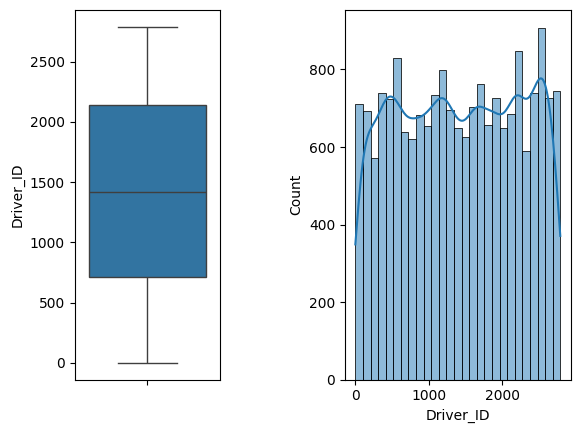

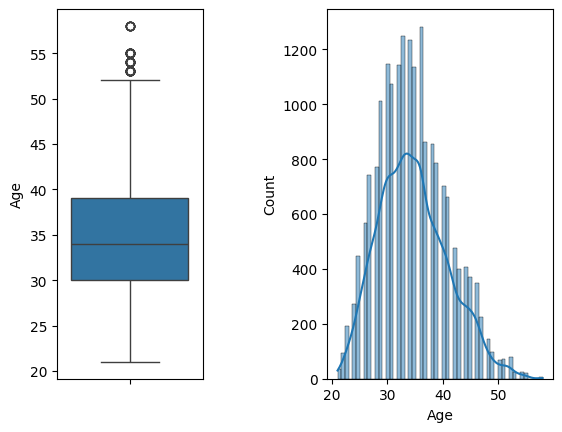

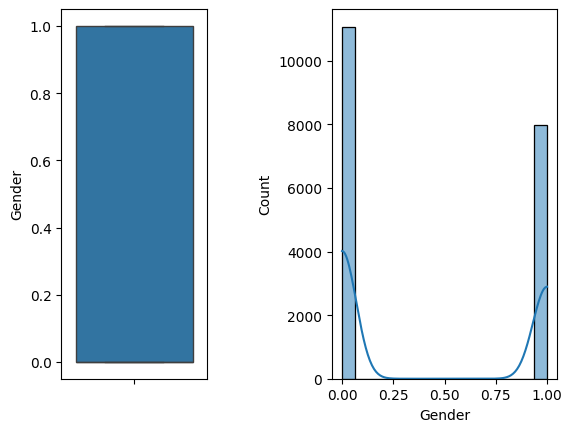

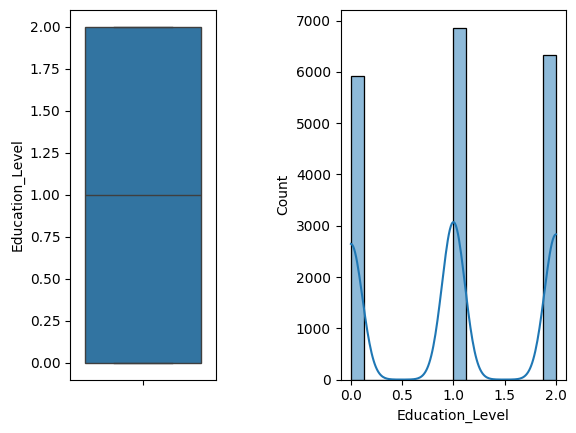

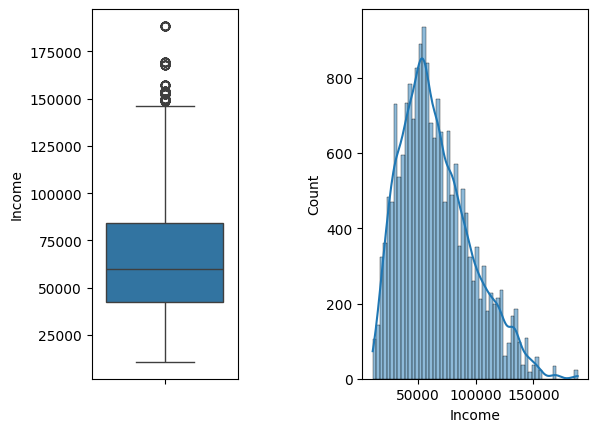

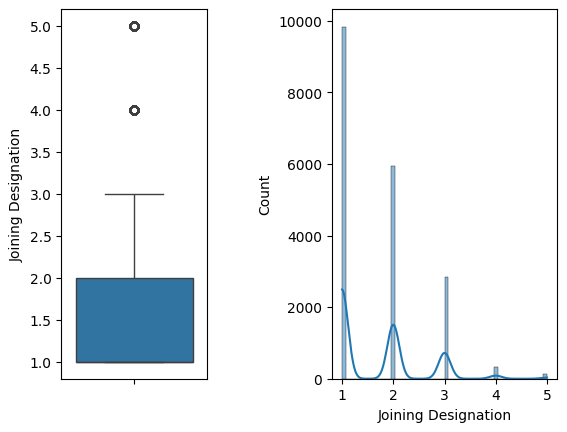

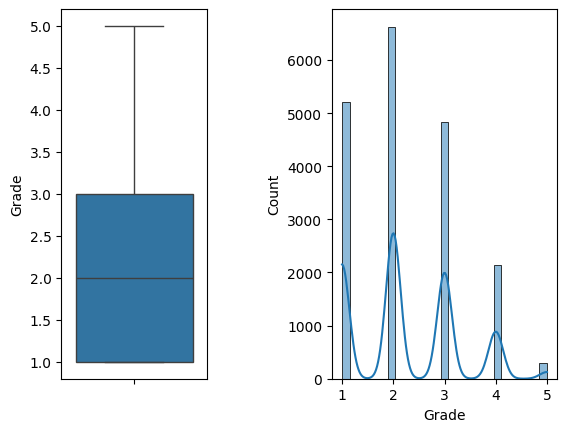

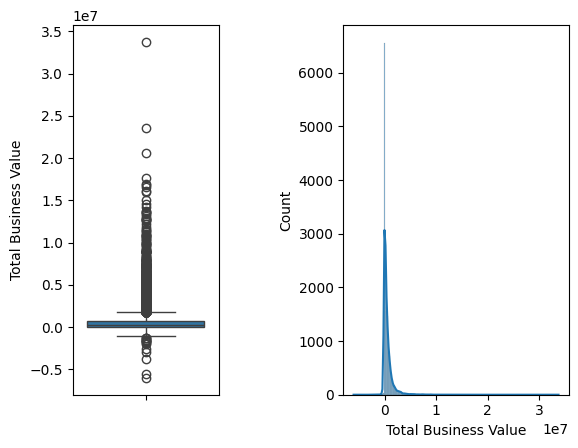

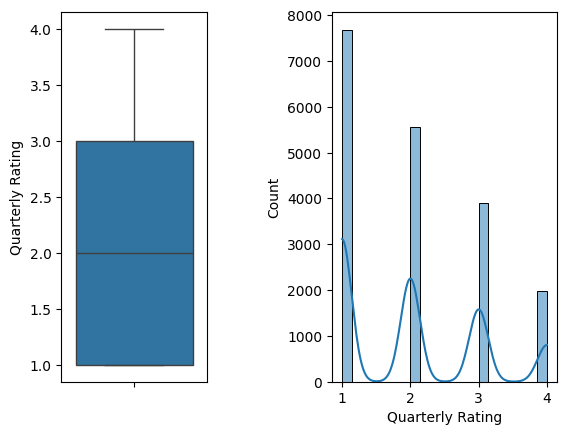

In [8]:
for i in numeric_cols:
    plt.subplot(1,3,1)
    sns.boxplot(df[i])
    plt.subplot(1,2,2)
    sns.histplot(df[i],kde=True)
    plt.show()

In [9]:
categoric_cols=df.select_dtypes(include=["object"]).columns

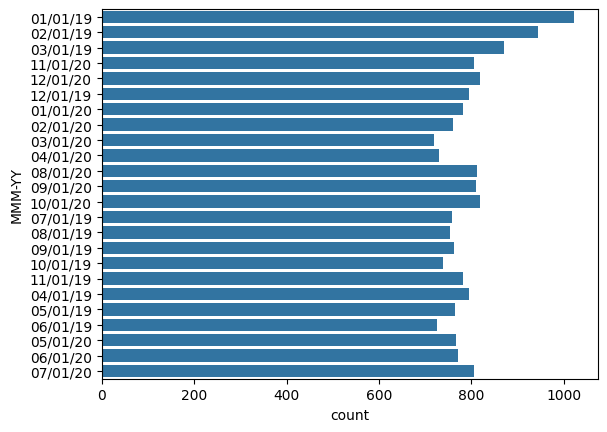

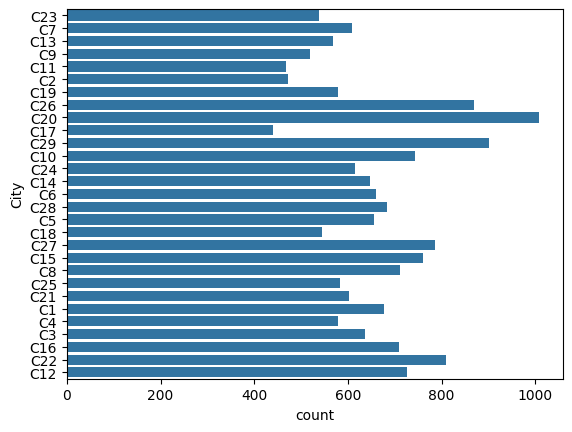

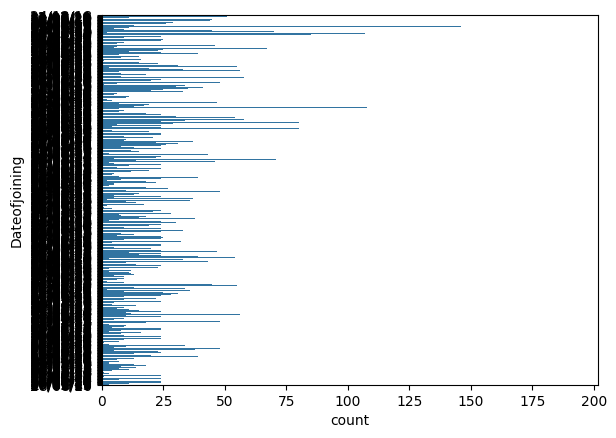

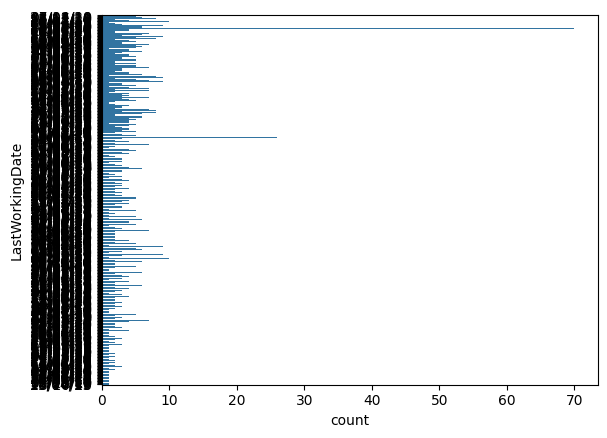

In [10]:
for i in categoric_cols:
    # plt.subplot(1,3,1)
    sns.countplot(df[i])
    # plt.subplot(1,2,2)
    # plt.pie(df[i])
    plt.show()

In [11]:
df["MMM-YY"]=pd.to_datetime(df["MMM-YY"],errors="coerce")
df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"],errors="coerce")
df["LastWorkingDate"]=pd.to_datetime(df["LastWorkingDate"],errors="coerce")

C:\Users\kashifa\AppData\Local\Temp\ipykernel_8560\2276207582.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["MMM-YY"]=pd.to_datetime(df["MMM-YY"],errors="coerce")
C:\Users\kashifa\AppData\Local\Temp\ipykernel_8560\2276207582.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"],errors="coerce")
C:\Users\kashifa\AppData\Local\Temp\ipykernel_8560\2276207582.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["LastWorkingDate"]=pd.to_datetime(df["LastWorkingDate"],errors="coerce")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [13]:
data=(df.groupby(df["Driver_ID"])["Quarterly Rating"].max()-df.groupby(df["Driver_ID"])["Quarterly Rating"].min()).reset_index()

In [14]:
data

,Driver_ID,Quarterly Rating
0,1,0
1,2,0
2,4,0
3,5,0
4,6,1
...,...,...
2376,2784,3
2377,2785,0
2378,2786,1
2379,2787,1


In [15]:
data.rename(columns={"Quarterly Rating":"Diff_QR"},inplace=True)

In [16]:
df=pd.merge(df,data,on="Driver_ID") 

In [17]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Diff_QR
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,2
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,2
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,2
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,2


In [18]:
df["QR_rating_inc"]=np.where(df["Diff_QR"]==0.0,0,1)

In [19]:
df.drop(columns=["Diff_QR"],axis=1,inplace=True)

In [20]:
data3=(df.groupby(df["Driver_ID"])["Income"].max()-df.groupby(df["Driver_ID"])["Income"].max()).reset_index()

In [21]:
data3.rename(columns={"Income":"income_diff"},inplace=True)

In [22]:
df=pd.merge(df,data3,on="Driver_ID")

In [23]:
df["Income_inc"]=np.where(df["income_diff"]==0.0,0,1)


In [24]:
df.drop(columns=["income_diff"],axis=1,inplace=True)

In [25]:
df["Target"]=np.where(df["LastWorkingDate"].notna(),1,0)

In [26]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,QR_rating_inc,Income_inc,Target
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0,0,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3,1,0,0
19100,2020-09-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3,1,0,0
19101,2020-10-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2,1,0,0
19102,2020-11-01,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2,1,0,0


In [27]:
df=df.groupby(df["Driver_ID"]).agg({"Age":"first","Gender":"first","City":"first","Education_Level":"first","Income":"mean","Dateofjoining":"first","Joining Designation":"first","Grade":"last","Total Business Value":"sum","Quarterly Rating":"mean","QR_rating_inc":"first","Income_inc":"first","Target":"last"}).reset_index()

In [28]:
df

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,QR_rating_inc,Income_inc,Target
0,1,28.0,0.0,C23,2,57387.0,2018-12-24,1,1,1715580,2.000000,0,0,1
1,2,31.0,0.0,C7,2,67016.0,2020-11-06,2,2,0,1.000000,0,0,0
2,4,43.0,0.0,C13,2,65603.0,2019-12-07,2,2,350000,1.000000,0,0,1
3,5,29.0,0.0,C9,0,46368.0,2019-01-09,1,1,120360,1.000000,0,0,1
4,6,31.0,1.0,C11,1,78728.0,2020-07-31,3,3,1265000,1.600000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.0,0.0,C24,0,82815.0,2015-10-15,2,3,21748820,2.625000,1,0,0
2377,2785,34.0,1.0,C9,0,12105.0,2020-08-28,1,1,0,1.000000,0,0,1
2378,2786,44.0,0.0,C19,0,35370.0,2018-07-31,2,2,2815090,1.666667,1,0,1
2379,2787,28.0,1.0,C20,2,69498.0,2018-07-21,1,1,977830,1.500000,1,0,1


In [29]:
df.isna().sum()

Driver_ID               0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Dateofjoining           0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
QR_rating_inc           0
Income_inc              0
Target                  0
dtype: int64

In [30]:
df.drop(columns=["Dateofjoining"],axis=1,inplace=True)

In [31]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,QR_rating_inc,Income_inc,Target
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.0,2381.000000
mean,1397.559009,33.090718,0.410332,1.00756,59232.460484,1.820244,2.096598,4.586742e+06,1.566304,0.463671,0.0,0.678706
std,806.161628,5.840686,0.491997,0.81629,28298.214012,0.841433,0.941522,9.127115e+06,0.719652,0.498783,0.0,0.467071
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.0,0.000000
25%,695.000000,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.0,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55285.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,0.0,1.000000
75%,2100.000000,37.000000,1.000000,2.00000,75835.000000,2.000000,3.000000,4.173650e+06,2.000000,1.000000,0.0,1.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,0.0,1.000000


In [32]:
df.select_dtypes(include=["int","float"]).corr()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,QR_rating_inc,Income_inc,Target
Driver_ID,1.000000,-0.008248,0.013707,-0.014343,-0.017553,-0.023126,-0.013897,0.015133,0.023867,0.008944,NaN,0.029269
Age,-0.008248,1.000000,0.031198,-0.009309,0.186245,0.099843,0.234195,0.192284,0.163885,0.135984,NaN,-0.046606
Gender,0.013707,0.031198,1.000000,-0.008773,0.006881,-0.046056,-0.003062,0.017560,0.000278,0.011974,NaN,0.008966
Education_Level,-0.014343,-0.009309,-0.008773,1.000000,0.140779,0.003203,-0.017352,0.001392,0.037169,0.058465,NaN,-0.007953
Income,-0.017553,0.186245,0.006881,0.140779,1.000000,0.484116,0.739181,0.368632,0.187621,0.168359,NaN,-0.197988
Joining Designation,-0.023126,0.099843,-0.046056,0.003203,0.484116,1.000000,0.712459,-0.121368,-0.193807,-0.148717,NaN,-0.127773
Grade,-0.013897,0.234195,-0.003062,-0.017352,0.739181,0.712459,1.000000,0.382062,0.108678,0.106788,NaN,-0.225585
Total Business Value,0.015133,0.192284,0.017560,0.001392,0.368632,-0.121368,0.382062,1.000000,0.712487,0.485252,NaN,-0.379552
Quarterly Rating,0.023867,0.163885,0.000278,0.037169,0.187621,-0.193807,0.108678,0.712487,1.000000,0.732962,NaN,-0.373683
QR_rating_inc,0.008944,0.135984,0.011974,0.058465,0.168359,-0.148717,0.106788,0.485252,0.732962,1.000000,NaN,-0.215149


In [33]:
x=df.drop(columns=["Target"],axis=1)

In [34]:
y=df["Target"]

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape,y_train.shape

((1904, 12), (1904,))

In [37]:
x_test.shape,y_test.shape

((477, 12), (477,))

In [38]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()
x_train["City"]=encoder.fit_transform(x_train["City"],y_train)


In [39]:
x_test["City"]=encoder.transform(x_test["City"])

In [40]:
pd.DataFrame(y_train).value_counts().reset_index()

,Target,count
0,1,1289
1,0,615


In [41]:
pd.DataFrame(y_test).value_counts().reset_index()

,Target,count
0,1,327
1,0,150


In [42]:
x_train

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,QR_rating_inc,Income_inc
457,534,28.0,0.0,0.745108,0,87872.0,3,3,0,1.000000,0,0
1739,2044,34.0,0.0,0.699186,0,38619.0,2,2,466160,1.000000,0,0
1848,2172,27.0,0.0,0.732320,0,53105.0,1,2,0,1.000000,0,0
1410,1658,29.0,1.0,0.611473,2,34234.0,1,1,3489080,1.857143,1,0
829,973,45.0,0.0,0.611473,0,90484.0,1,3,22388420,2.625000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1925,27.0,0.0,0.639958,1,63402.0,2,2,0,1.000000,0,0
1095,1287,26.0,1.0,0.701157,1,52789.0,1,1,1227460,1.375000,1,0
1130,1331,39.0,1.0,0.701157,1,17493.0,1,1,478360,1.000000,0,0
1294,1521,31.0,0.0,0.699186,1,31401.0,1,1,0,1.000000,0,0


In [43]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data_training=scaler.fit_transform(x_train)

In [45]:

scaled_data_testing=scaler.transform(x_test)

In [46]:
scaled_data_training

array([[-1.0816992 , -0.89066866, -0.83303672, ..., -0.78738349,
        -0.93291692,  0.        ],
       [ 0.78873533,  0.13421035, -0.83303672, ..., -0.78738349,
        -0.93291692,  0.        ],
       [ 0.94728872, -1.06148183, -0.83303672, ..., -0.78738349,
        -0.93291692,  0.        ],
       ...,
       [-0.09445661,  0.98827618,  1.20042727, ..., -0.78738349,
        -0.93291692,  0.        ],
       [ 0.14089608, -0.37822916, -0.83303672, ..., -0.78738349,
        -0.93291692,  0.        ],
       [-0.49084008, -0.54904232, -0.83303672, ..., -0.78738349,
        -0.93291692,  0.        ]], shape=(1904, 12))

In [47]:
scaled_data_testing

array([[ 0.31679125,  0.47583668, -0.83303672, ..., -0.78738349,
        -0.93291692,  0.        ],
       [-0.1774494 , -1.06148183,  1.20042727, ..., -0.78738349,
        -0.93291692,  0.        ],
       [ 0.26104982, -0.71985549, -0.83303672, ..., -0.78738349,
        -0.93291692,  0.        ],
       ...,
       [-0.84510781, -0.71985549, -0.83303672, ..., -0.78738349,
        -0.93291692,  0.        ],
       [-0.39669901,  0.30502351, -0.83303672, ...,  0.84620067,
         1.07190681,  0.        ],
       [ 1.3399561 ,  0.47583668,  1.20042727, ...,  1.25459671,
         1.07190681,  0.        ]], shape=(477, 12))

In [48]:
x_train[x_train_smt.columns]=scaled_data_training

In [49]:
x_train

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,QR_rating_inc,Income_inc
457,-1.081699,-0.890669,-0.833037,0.946106,-1.241468,1.003180,1.386445,0.949846,-0.507968,-0.787383,-0.932917,0.0
1739,0.788735,0.134210,-0.833037,0.310558,-1.241468,-0.734300,0.202151,-0.107760,-0.457571,-0.787383,-0.932917,0.0
1848,0.947289,-1.061482,-0.833037,0.769128,-1.241468,-0.223283,-0.982143,-0.107760,-0.507968,-0.787383,-0.932917,0.0
1410,0.310598,-0.719855,1.200427,-0.903393,1.214381,-0.888988,-0.982143,-1.165366,-0.130762,0.379462,1.071907,0.0
829,-0.537911,2.013155,-0.833037,-0.903393,-1.241468,1.095323,-0.982143,0.949846,1.912452,1.424762,1.071907,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.641330,-1.061482,-0.833037,-0.509156,-0.013543,0.139961,0.202151,-0.107760,-0.507968,-0.787383,-0.932917,0.0
1095,-0.148959,-1.232295,1.200427,0.337834,-0.013543,-0.234430,-0.982143,-1.165366,-0.375267,-0.276888,1.071907,0.0
1130,-0.094457,0.988276,1.200427,0.337834,-0.013543,-1.479554,-0.982143,-1.165366,-0.456252,-0.787383,-0.932917,0.0
1294,0.140896,-0.378229,-0.833037,0.310558,-0.013543,-0.988927,-0.982143,-1.165366,-0.507968,-0.787383,-0.932917,0.0


In [50]:
x_test[x_test.columns]=scaled_data_testing

In [51]:
x_test

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,QR_rating_inc,Income_inc
1414,0.316791,0.475837,-0.833037,-1.176133,1.214381,0.001641,0.202151,-0.107760,-0.507968,-0.787383,-0.932917,0.0
1075,-0.177449,-1.061482,1.200427,-2.159167,1.214381,0.632670,-0.982143,0.949846,-0.351715,-0.787383,-0.932917,0.0
1376,0.261050,-0.719855,-0.833037,0.229146,-0.013543,-0.086409,0.202151,-0.107760,-0.507968,-0.787383,-0.932917,0.0
2002,1.169016,-0.378229,-0.833037,-1.176133,1.214381,-0.998698,-0.982143,-1.165366,-0.507968,-0.787383,-0.932917,0.0
1104,-0.132856,0.305024,-0.833037,-2.159167,1.214381,-0.691827,-0.982143,-1.165366,-0.470129,-0.787383,-0.932917,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,-1.216717,2.013155,-0.833037,-0.903393,-0.013543,-1.005859,-0.982143,0.949846,1.117665,0.744102,1.071907,0.0
1911,1.033998,0.305024,-0.833037,-0.418717,-1.241468,0.398574,0.202151,-0.107760,-0.507968,-0.787383,-0.932917,0.0
621,-0.845108,-0.719855,-0.833037,0.310558,-1.241468,-1.410306,-0.982143,-1.165366,-0.485109,-0.787383,-0.932917,0.0
923,-0.396699,0.305024,-0.833037,-0.418717,-1.241468,1.073099,1.386445,0.949846,-0.231934,0.846201,1.071907,0.0


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100,max_depth=4,random_state=42)


In [53]:
rf_clf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
round(rf_clf.score(x_train,y_train),2)*100

78.0

In [55]:
round(rf_clf.score(x_test,y_test),2)*100

74.0

In [56]:
from sklearn.model_selection import KFold,cross_validate
from sklearn.ensemble import RandomForestClassifier
rf_clf2=RandomForestClassifier(random_state=42,max_depth=4,n_estimators=100)

kfold=KFold(n_splits=5)
cv_score=cross_validate(rf_clf2,x_train,y_train,cv=kfold,scoring="accuracy",return_train_score=True)


In [57]:
cv_score["train_score"].mean()*100


np.float64(78.11177862452027)

In [58]:
cv_score["test_score"].mean()*100

np.float64(76.31109269236083)

In [59]:
rf_clf2.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
from sklearn.model_selection import GridSearchCV
param_grid={"n_estimators":[100,200,300],
            "max_depth":[4,5,6,8],
            "min_samples_split":[2,5,10],
            "min_samples_leaf":[1,2,4]}
grid=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5,n_jobs=-1,scoring="accuracy")
grid.fit(x_train,y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [4, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [61]:

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.7778284293410691


In [62]:
rf_clf3=RandomForestClassifier(random_state=42,max_depth=8,min_samples_leaf=2,min_samples_split=5,n_estimators=300)

In [63]:
rf_clf3.fit(x_train,y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,8
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
print("Traning Score :",round(rf_clf3.score(x_train,y_train),2)*100)
print("Traning Score :",round(rf_clf3.score(x_test,y_test),2)*100)

Traning Score : 84.0
Traning Score : 77.0


In [65]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
y_pred=rf_clf3.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [66]:
confusion_matrix(y_test,y_pred)

array([[ 57,  93],
       [ 18, 309]])

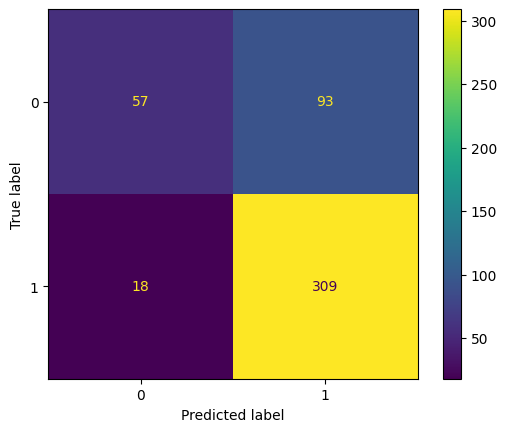

In [67]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.38      0.51       150
           1       0.77      0.94      0.85       327

    accuracy                           0.77       477
   macro avg       0.76      0.66      0.68       477
weighted avg       0.77      0.77      0.74       477



In [69]:
from sklearn.metrics import roc_auc_score,roc_curve
probability = rf_clf3.predict_proba(x_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)

In [70]:
print(f'FPR:\n {fpr}\n\n\n')
print(f'TPR:\n {tpr}\n\n\n')
print(f'Threshold:\n {thr}')


FPR:
 [0.         0.         0.         0.01333333 0.01333333 0.02
 0.02       0.02666667 0.02666667 0.03333333 0.03333333 0.04
 0.04       0.04666667 0.04666667 0.05333333 0.05333333 0.06666667
 0.06666667 0.08       0.08       0.08666667 0.08666667 0.09333333
 0.09333333 0.1        0.1        0.10666667 0.10666667 0.11333333
 0.11333333 0.12       0.12       0.12666667 0.12666667 0.14
 0.14       0.15333333 0.15333333 0.16       0.16       0.16666667
 0.16666667 0.17333333 0.17333333 0.18       0.18       0.18666667
 0.18666667 0.19333333 0.19333333 0.2        0.2        0.20666667
 0.20666667 0.22       0.22       0.23333333 0.23333333 0.24
 0.24       0.25333333 0.25333333 0.26       0.26       0.26666667
 0.26666667 0.27333333 0.27333333 0.28       0.28       0.29333333
 0.29333333 0.30666667 0.30666667 0.31333333 0.31333333 0.32
 0.32       0.32666667 0.32666667 0.33333333 0.33333333 0.34666667
 0.34666667 0.35333333 0.35333333 0.36       0.36       0.37333333
 0.37333333 0.38666

In [71]:
auc = roc_auc_score(y_test, probabilites)
print("ROC-AUC Score:", auc)


ROC-AUC Score: 0.7530682976554537


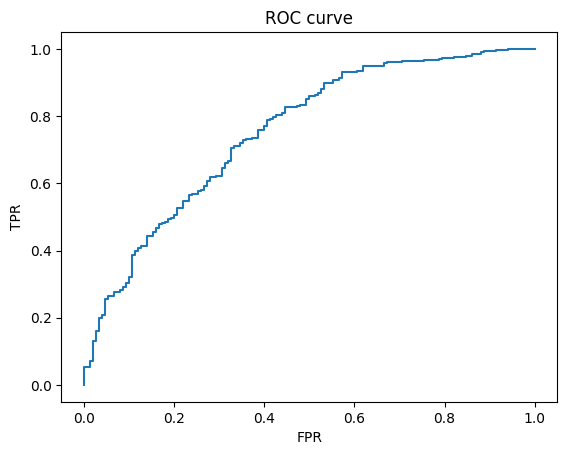

In [72]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV


In [74]:
params = {
    "n_estimators": [50,100,150,200,250],
    "max_depth" : [3,4,5,7,8],
    "max_leaf_nodes" : [20,40,80],
    "learning_rate": [0.1,0.2,0.3]
}

In [75]:
model = GradientBoostingClassifier()

In [76]:
rscv = RandomizedSearchCV(model, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

In [77]:
rscv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,GradientBoostingClassifier()
,param_distributions,"{'learning_rate': [0.1, 0.2, ...], 'max_depth': [3, 4, ...], 'max_leaf_nodes': [20, 40, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [78]:
print(rscv.best_estimator_)

GradientBoostingClassifier(max_leaf_nodes=20)


In [79]:
gbc = rscv.best_estimator_

In [80]:
gbc.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [81]:
print(f"Training Accuracy: {gbc.score(x_train, y_train)}")

Training Accuracy: 0.8371848739495799


In [82]:
print(f"Test Accuracy: {gbc.score(x_test, y_test)}")

Test Accuracy: 0.7526205450733753


In [83]:
y_hat=gbc.predict(x_test)

In [84]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50       150
           1       0.77      0.92      0.84       327

    accuracy                           0.75       477
   macro avg       0.73      0.65      0.67       477
weighted avg       0.74      0.75      0.73       477



In [85]:
probability2 = gbc.predict_proba(x_test)
probabilites2 = probability2[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites2)

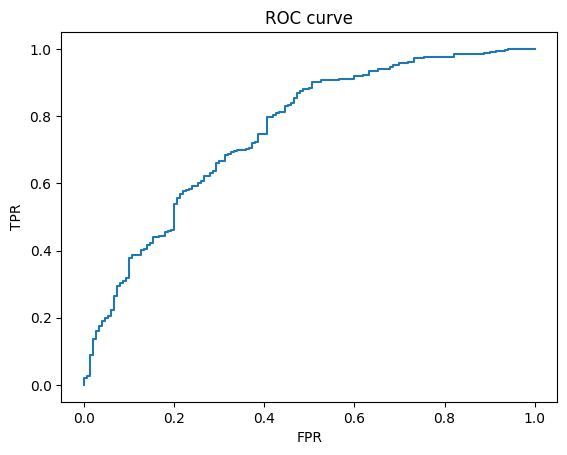

In [86]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [87]:
auc = roc_auc_score(y_test, probabilites2)
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.7536595310907237


In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
xg=XGBClassifier()

In [89]:
params={
    "n_estimators":[100,200,300,400],
    "max_depth":[4,5,6,8],
    "learning_rate": [0.1,0.2,0.3]

}
rscv_xg=RandomizedSearchCV(xg,params,scoring="accuracy",cv=5,n_jobs=-1,verbose=1)
rscv_xg.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.1, 0.2, ...], 'max_depth': [4, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [90]:
rscv_xg.best_params_

{'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}

In [91]:
rscv_xg.best_estimator_

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [92]:
rscv_xg.score(x_train,y_train)

0.9044117647058824

In [93]:
rscv_xg.score(x_test,y_test)

0.7484276729559748

In [94]:
y_train_pred = rscv_xg.predict(x_train)
y_test_pred = rscv_xg.predict(x_test)

In [95]:
r2_score(y_train,y_train_pred)


0.5628703160576989

In [96]:
r2_score(y_test,y_test_pred)

-0.16697247706422025

In [97]:
probability3 = rscv_xg.predict_proba(x_test)
probabilites3 = probability3[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites3)

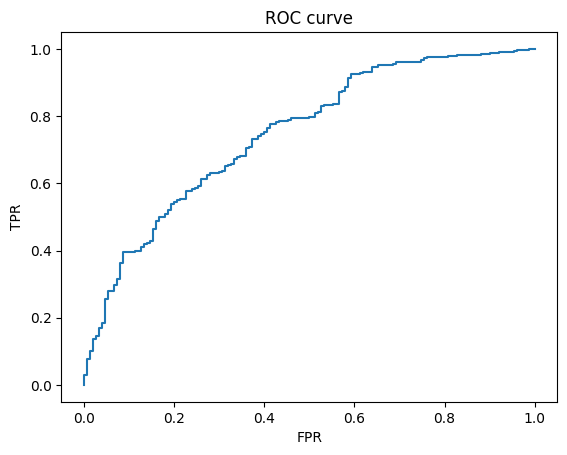

In [98]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [102]:
estimator_=[
    ("knn",KNeighborsClassifier(n_neighbors=5)),
    ("dt",DecisionTreeClassifier(random_state=42)),
    ("lr",LogisticRegression()),
    # ("lir",LinearRegression()),
    ("rf",RandomForestClassifier(n_estimators=200,max_depth=8)),
    ("gbdt",GradientBoostingClassifier()),
    ("xgb",XGBClassifier())
]

final_estimator_=RandomForestClassifier(n_estimators=100,max_depth=6)

stacking_model=StackingClassifier(estimators=estimator_,final_estimator=final_estimator_,cv=5)

In [103]:
stacking_model.fit(x_train,y_train)

,estimators,"[('knn', ...), ('dt', ...), ...]"
,final_estimator,RandomForestC...r(max_depth=6)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [104]:
stacking_model.score(x_train,y_train)

0.8293067226890757

In [105]:
stacking_model.score(x_test,y_test)

0.7672955974842768

In [106]:
y_pred=stacking_model.predict(x_test)

In [109]:
probability4 = stacking_model.predict_proba(x_test)
probabilites4 = probability4[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites4)

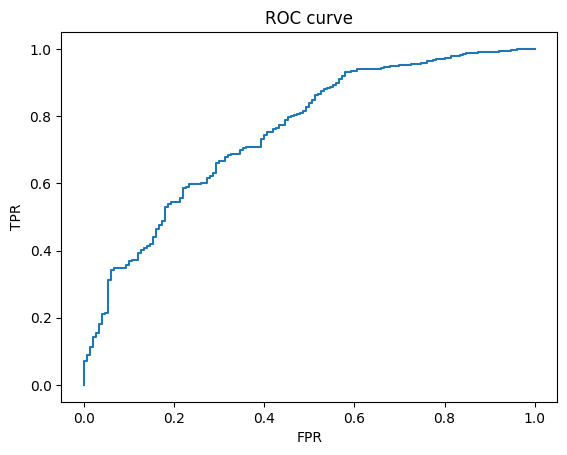

In [110]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()